# Decision Trees for Classification

(beginner's level)

In this tutorial we give a beginner's introduction to the Decision Tree learning which is a supervised algorithm. The Decision Tree models are simple to understand, easy to interpret and convinient to deploy. Although they can be used for both classification and regression, examples in this discussion foucs on classification problems only.  

Being a supervised learning algorithm, the model building in Decision Tree classification includes a training phase where it tries to learn the rules of distinction between classes using examples from the historic data. Each of the training examples consist of values corresponding to a set of descriptory variables called features and with a label that identifies its class.

For long various tree like graphs have been used as decision support systems. A familiar example is how a physician would diagnose an illness based on a series of questions designed around symptoms. But in our current context, the term Decision Tree refers specifically to a Binary Tree data structure thats capable of learning from exposure to data. A modern name for this algorithm is CART which is an acronym for Classification And Regression Trees but we here stick to it's traditional name 'Decision Tree' abbreciated as DT in this tutorial. 

## Representation and Learning

As just said, The DT model is respresented as a binary tree. The binary tree is a succession of records called "nodes". Each node is linked to atmost two successor nodes referred to as its left and right children. 
- The first node at the origin of the tree has no parent and is called "root node" and the terminating nodes that do not have any successors are called "leafs or terminal nodes". 
- In a non-trivial tree, the root node is linked to each leaf through a series of "intermediate nodes". 
- The number of steps between root and the furthest leaf node is called the height of the tree.
- Each non-leaf node in a DT represents a splitting condition based on a single feature variable. Based on how splitting condition evaluates for a data record on the node, the record gets to assigned to either of its children. - This process continues till the record trickles down to a leaf node - each of which is associated with a class label. 

![DTdemo.png](https://github.com/lovedeepkaursaini/Decision_Trees/blob/master/DTdemo.png)

With this simple binary tree representation of trained model, making predictions for new unseen data is straight forward. The new data record would travel through the tree until it ends up on one of the leaf nodes; and the class label of the leaf node assigned as the final resulting label of the new record.  

Now what makes the tree to decide the best 'splitting' and 'stopping' condition? 

### Split Criterion

Finding a best split condition at any node involves identifying which feature to use as well as deciding the boundary of split. For each of the available input feature, all possible split points are evaluated using a cost function with an aim to minimize it. The popular strategies for defining cost function are based on the choices such that each split minimizes the impurity at the child nodes. Most common criteria to measure the quality of a split are:

#### GINI Index

The GINI index for a node measures the impurity. Its defined in a way that its value is minimum when all the records at the node belongs to same class and maximum when each record belongs to a distinct class resulting in 50-50 split of classes in a binary classification problem. In GINI driven DT algorithms, the split condition is chosen to ensure that overall impurity after the split is as less possible as than the impurity at parent node. 
- The calculation of GINI index is quite simple - subtract the sum of the squared probabilities of each class from one.  

#### Information Gain

The information gain is based on the decrease in entropy after a split on an attribute of training dataset. The Entropy at a node is a measure of randomness in its data. Constructing a decision tree is all about finding feature that returns the highest information gain (i.e., the most homogeneous branches).
- It is calculated as multiplication of the probability of the class times the log of that class probability. 


### Stopping Criterion

The DT learning needs to know when to stop splitting as it works its way down the tree with training data. 
- An obvious idea is to reject a split if number of data records at any of the children-node is less than some threshold. This way a particular branch would stop growing once this condition of minimum number of data records in terminal node is met.
- Another idea is to pre-define the maximum depth of the tree i.e. the maximum number of nodes from the root node of the tree. Once this condition of maximum depth of the tree is met, further splitting into new nodes must stop.

Without such stopping requirements, the tree might grow deep and complex, resulting into ovefit the training data (overfit problem - discussed later in this section).

## A Working Example

To understand how the DT sturuture is built let us consider a small and simple wine quality dataset. It can be found in the [wine quality data set from the UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). This dataset is one of the most popular data sets to get started on machine learning, so you might know about it's details, and if not you need to know the description of features [here](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names).
We will consider white-wine dataset for our purpose, that has 12 variables. For the purpose of this tutorial, we don't need to go into details of all those features except for ** "quality": this is our target variable. Experts have graded the wine quality between 0 (very bad) and 10 (very excellent).** 


### A First Look at Data

In [1]:
#Load the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
# get the data and create dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv' , sep = ';')

### Data Processing and Preparation
Let's turn that ordinal class into an binary class. We will define a function named as "Taste" that will check if quality > 5 or not. And then we will apply that to the dataset based on the value of the "quality" feature. We want to build a classifier for good taste wine vs bad taste one. 

In [2]:
print(df['quality'].value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [3]:
def Taste(quality):
    if quality > 5:
        return 0
    else:
        return 1

df['quality'] = df['quality'].apply(Taste)
print(df['quality'].value_counts())

0    3258
1    1640
Name: quality, dtype: int64


Class as pie chart:


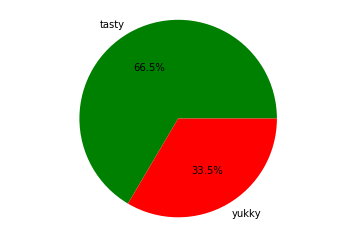

In [4]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df["quality"].value_counts(),autopct='%1.1f%%', labels=['tasty','yukky'], colors=['g','r'])
plt.axis('equal')
plt.ylabel('')

### Train and Test split of dataset
We will split our dataset into 70:30 ratio for training and testing of model. Let us import the "train_test_split" from "sklearn.model_selection" and assign the data and the target labels to the variables X and y.

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101, stratify=y)

### Using DT Classifier from scikit-learn

Let us now create tree from training subset. We will use DT algorithm implementation in scikit-learn package that takes some important parameters like for splitting and stopping criteria as discussed above. 

In exercise below, we will use the default parameters but you can play with changing "criterion" that defines the function to measure the quality of the split. The [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) package supports "gini" and "entropy" as two different split methods.

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #create an instance of DecisionTreeClassifier() called dtree 
dtree.fit(X_train,y_train) #and fit it to the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Making Predictions

We will use the trained model to predict the class label from the unseen test subset of data. In simple words, now the set of rules that our tree has learned, will now be traversed by the test data to check the quality of wine. 

In [7]:
#Testing Phase: Test trained DT
predictions_gini = dtree.predict(X_test)                          #Make predictions from "gini" based tree. 

### Evaluating the Model Performance
Like everything else in life, machine learning algorithms too are not perfect and might make mistakes. In our current example the mistakes can fundamentally be of two types:

1. Type 1 Error : The trained DT disqualify wine that is actually qualified i.e. has quality score >5 in original dataset.
2. Type 2 Error : The trained DT qualifies wine that didn't actually qualify (quality < 5 in original dataset).

Its obviously very important for a data scientist to be acutely aware of how often the prediction might be incorrect or in other words he/she should know how well the model performs. 
- Such an evaluation is done by using a DT to classify a test dataset with known values of target attribute. 
- Model performance can then be established using metrics like precision, recall, f1-score which are computed by comparing predicted values of target to the true ones. 

The choice of accuracy metric depends on the question you want to answer. for this tutorial, let us focus on model sensitivity or recall score. It will check how many of true bad quality wine samples are actually caught by the DT model. This could be an important answer for a winery if it want only the best of bested wine to supply in the market.

Below we show how to use the scikit-learn for performance evaluation:

In [8]:
from sklearn.metrics import classification_report, recall_score
#Evaluation Phase
report = classification_report(y_test,predictions_gini)     #Obtaining the clasfxn report
print('\n Classification Report')
print(report)
print ('Model sensitivity: ', recall_score(y_test,predictions_gini))


 Classification Report
             precision    recall  f1-score   support

          0       0.83      0.86      0.85       978
          1       0.70      0.65      0.68       492

avg / total       0.79      0.79      0.79      1470

Model sensitivity:  0.654471544715


** 65% of bad quality samples are detected by this DT model **

But be careful this is very deep and complex tree with 1039 nodes. You can check the complexity of this tree with simple count on number of tree nodes or tree depth.

In [9]:
n_nodes = dtree.tree_.node_count
print("number of nodes in trained tree: ", n_nodes)

number of nodes in trained tree:  1033


## Effect of  Statistical Noise

Every dataset contains random noise on account of statistical fluctuations or irreducible error. A good model is the one that seeks to learn systematic mapping between the features and neglects the noise. 

### Overfitting
A situation when model treats the statistical noise in training sample as a valid pattern is called Overfitting. It is a problem, training sample noise is unique to it and will adversely affect the model's performance on test samples since they have their own noise patterns. Algorithmically this happens when a learner tree continues to go deeper and deeper in splitting, building several branches just because of outliers and other irregularities in data. 

### Pruning
The DT learning is notoriously prone to the problem of overfitting. There are several approaches that can help improve the performance by supressing the effects of overfitting. Each of these involve enforcing some simplicity measures called pruning to keep the tree from being far too deep and complex. 
In scikit-learn's DT module, there are a variety of methods used during tree growth to decide whether a node should be split or whether it should be declared a leaf node. We can use max_depth, min_samples_split, min_samples_leaf and so on. More options can be checked [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)


** Let us try to restrict the tree complexity with pre-defining the tree depth as 1 **

In [10]:
from sklearn.metrics import classification_report, recall_score
dtree_preP = DecisionTreeClassifier(max_depth=1)    #set maximum depth of tree to be 3.
dtree_preP.fit(X_train,y_train)
predictions_preP = dtree_preP.predict(X_test)
report = classification_report(y_test,predictions_preP)     #Obtaining the clasfxn report
print('\n Classification Report')
print(report)
print ('Model sensitivity: ', recall_score(y_test,predictions_preP))
n_nodes = dtree_preP.tree_.node_count
print("number of nodes in trained tree: ", n_nodes)


 Classification Report
             precision    recall  f1-score   support

          0       0.82      0.68      0.74       978
          1       0.52      0.70      0.60       492

avg / total       0.72      0.69      0.69      1470

Model sensitivity:  0.701219512195
number of nodes in trained tree:  3


We can notice that with a this simple tree we have 5% gain in model sensitivity. Remember that we're interested in predicting a high fraction of bad quality wine. We usually try to tune the parameters of model such that we get a value as close to one as possible. You can try to play with other paramter setting to optimize the model and improve the sensitivity score.

Let us try to plot the model sensitivity vs tree depth, to understand the concept of "overfitting". 

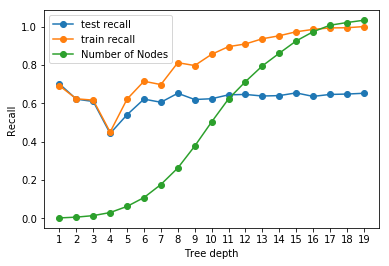

In [11]:
depth_range = range(1, 20)
trainAcc = []
testAcc = []
numNodes = []
for k in depth_range:
    dtree = DecisionTreeClassifier(max_depth=k)
    dtree.fit(X_train,y_train)
    y_pred_test = dtree.predict(X_test)
    y_pred_train = dtree.predict(X_train)
    testAcc.append(recall_score(y_test,y_pred_test))
    trainAcc.append(recall_score(y_train,y_pred_train))
    numNodes.append(float(dtree.tree_.node_count)*0.001)    #0.001 is there just to scale it down 

# Plot tree depth vs recall score
plt.plot(depth_range, testAcc, marker='o', label = "test recall")
plt.plot(depth_range, trainAcc, marker='o', label = "train recall")
plt.plot(depth_range, numNodes, marker='o', label = "Number of Nodes")
plt.xlabel('Tree depth')
plt.ylabel('Recall')
plt.xticks(depth_range)
plt.legend()
plt.show()

You can notice in this plot that as you keep on increasing the model depth you increase the number of nodes (shown in green color) i.e. tree complexity. 

The sensitivity score for training sample is increasing with increase in tree depth but the test score is not following the same trend. This shows us that traing sample is picking up all noises from the train sample and is not able to generalize it's predictions on unseen test sample. So, it's better to keep the tree simple by restricting the tree depth to 1.

### Visualizing the Trained DT

A great advantage with DT is how easily they could be visualized and interpretted. 
We can easily export the trained tree in Graphviz (a visulization software) format using the export_graphviz exporter and visulize the set of rules alongwith gini or entropy score and training records in each node.

First we show the pruned tree as it is simple to understand:

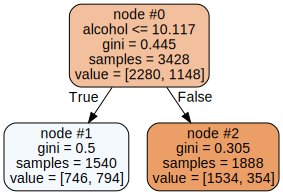

In [12]:
import graphviz
import pydot 
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree_preP, feature_names =X.columns[:], leaves_parallel = True,
                           node_ids = True, filled=True, rounded=True,out_file=None, max_depth = 3)
graphviz.Source(dot_data) 

As can be seen from above picture, root node (node-0) checks if alcohol content in white wine is less than or more than 10% and classifies the training subset that has 2280 bad and 1148 good quality wine samples. It ends with two child nodes which are not so pure given gini score in them. 

But note that our purpose here is just to get a data driven model that has a simple set of rules to predict the class for a new sample.

Below let us visulize the unpruned complex tree that we trained before just for the purpose of getting a notion of how complex the tree was. Since this is more than 1000 nodes tree, while plotting we have restricted the depth to be 3. 

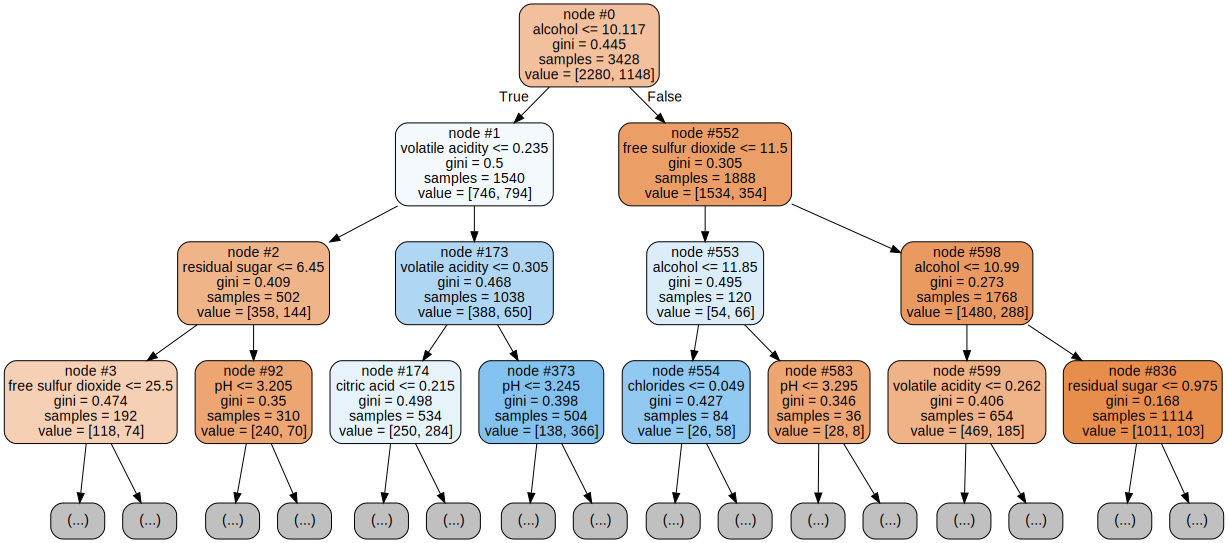

In [13]:
import graphviz
import pydot 
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, feature_names =X.columns[:], leaves_parallel = True,
                           node_ids = True, filled=True, rounded=True,out_file=None, max_depth = 3)
graphviz.Source(dot_data) 

## Advantages and Disadvantages 

We have seen that Decision Trees algorithms have several advantages. 

1. Decision Trees are easy to explain as they result in a set of simple decision rules.
2. It follows the same approach as humans generally follow while making decisions.
3. Interpretation of a Decision Tree model can be simplified by its visualizations.
4. Unlike several other alogrithms DT can handle huge data sets with mixed predictors.
5. Can easily ignore the redundant variables and help in selecting best features.
6. Handle missing data elegantly.

These are definitely huge positives especially while working in commerical environment where not all the stake holders are either interested or capable of understanding complex modeling approaches. But decision trees have some very prominent disadvantages too:

Disadvantages:

1. Very high probability of overfitting as noticed in above plots.
2. Generally, DTs have lower prediction accuracy compared to other machine learning algorithms.
3. Can be unstable because small variations in datasets can result in completely different trees, but ensemble of DTs can help here.
4. Calculations can become complex when there are many class labels. 
   - You can try to check this with a simple change in above tutorial, just do not use the function "Taste".
5. For imbalanced classes, DTs can be biased towards dominating classes. So, dataset should be balanced prior to train the DT model. 
   - You can check this by doing a simple change in Taste fucntion, set the quality for pure class to be more than 7 and redo the tutorial.

## Enhancing Decision Trees

The plain vanila DT learners are simple but often not very useful in real life situations. Several variations of DTs have been developed to overcome the disadvantages and achieve robust and powerful classification algorithms. This simple algorithm provides a base for several ensemble methods like bagging, random forests and boosting that we will discuss in separate tutorial.